In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

# import pandas_profiling

# NLTK
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from textblob import TextBlob

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.3 (default, Apr  3 2019, 05:39:12) 
[GCC 8.3.0]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.3
-------------------------


In [2]:
train = pd.read_csv('../data/train (3) (1) (3).csv',index_col=0)
test = pd.read_csv('../data/test (3) (1) (3).csv',index_col=0)

In [3]:
train.head()

,App Version Code,App Version Name,Review Text,Review Title,Star Rating
id,,,,,
b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,NaN,NaN,Very bad wallet balance not use.,NaN,1
c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,NaN,1
93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,Waste no use,2
df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,NaN,5
11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,NaN,5


### Rename column names

In [4]:
train = train.rename(columns = {'App Version Code':'App_Version_Code',
                                'App Version Name':'App_Version_Name',
                                'Review Text':'Review_Text',
                                'Review Title':'Review_Title',
                                'Star Rating':'Star_Rating'})

In [5]:
temp = train[['App_Version_Name','App_Version_Code']].copy()
temp = temp.groupby('App_Version_Code')
temp.first()

,App_Version_Name
App_Version_Code,
1.0,1.00
2.0,1.10
9.0,1.30
10.0,1.40
11.0,1.50
13.0,1.70
14.0,1.70
17.0,1.80
18.0,1.80


In [6]:
train.corr() 

,App_Version_Code,App_Version_Name,Star_Rating
App_Version_Code,1.000000,0.797276,0.119184
App_Version_Name,0.797276,1.000000,0.057669
Star_Rating,0.119184,0.057669,1.000000


### Here we can see very positive correlation(0.8) between version and each version code has unique name. So we use only verson code.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5693 entries, b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9 to 0a4c9a2a-8510-4e1d-a5ba-bd30afbac09a
Data columns (total 5 columns):
App_Version_Code    4554 non-null float64
App_Version_Name    4554 non-null float64
Review_Text         5692 non-null object
Review_Title        602 non-null object
Star_Rating         5693 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 266.9+ KB


In [8]:
train.describe()

,App_Version_Code,App_Version_Name,Star_Rating
count,4554.000000,4554.000000,5693.000000
mean,71.250329,2.290832,3.479009
std,15.572342,0.244186,1.793187
min,1.000000,1.000000,1.000000
25%,66.000000,2.270000,1.000000
50%,75.000000,2.340000,5.000000
75%,82.000000,2.420000,5.000000
max,90.000000,2.900000,5.000000


### Missing values App_Version_Code,Review_Title

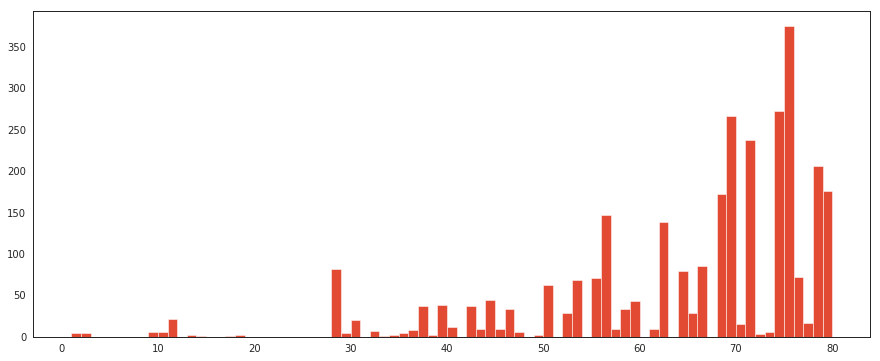

In [9]:
plt.figure(figsize=(15,6))
plt.hist(train['App_Version_Code'], bins = range(1,81))
plt.show()

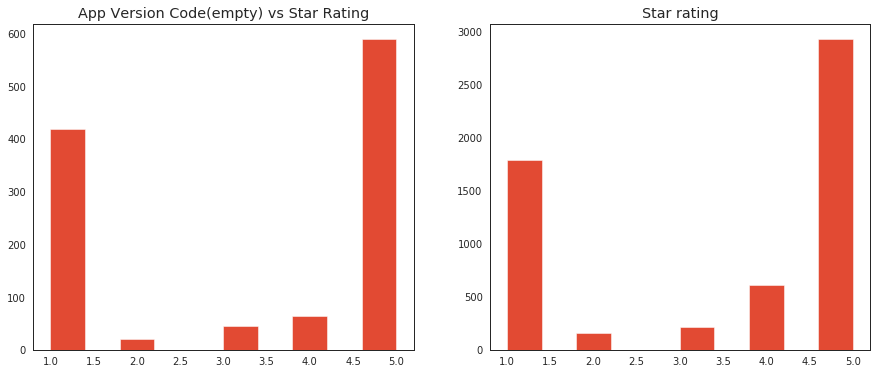

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(train[pd.isnull(train['App_Version_Code'])]['Star_Rating'])
plt.title('App Version Code(empty) vs Star Rating')
plt.subplot(1, 2, 2)
plt.hist(train.Star_Rating)
plt.title('Star rating')
plt.show()

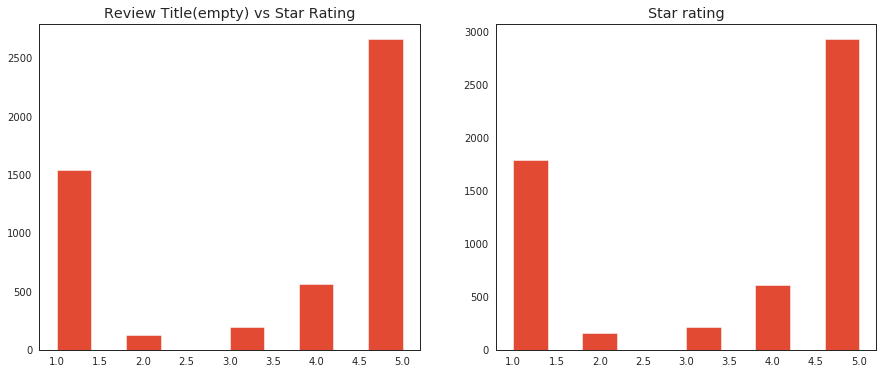

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(train[pd.isnull(train['Review_Title'])]['Star_Rating'])
plt.title('Review Title(empty) vs Star Rating')
plt.subplot(1, 2, 2)
plt.hist(train.Star_Rating)
plt.title('Star rating')
plt.show()

In [12]:
train['App_Version_Code'].fillna(0, inplace = True)
train['Review_Title'].fillna('X', inplace = True)
train['App_Version_Code'] = train['App_Version_Code'].astype(int)
train['Review_Text'] = train['Review_Text'].astype(str).str.lower()
train['Review_Title'] = train['Review_Title'].astype(str).str.lower()

Here we fill 0 in missing App_Version_Code and "X" in Review_title.
Also we will change text to lower case.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5693 entries, b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9 to 0a4c9a2a-8510-4e1d-a5ba-bd30afbac09a
Data columns (total 5 columns):
App_Version_Code    5693 non-null int64
App_Version_Name    4554 non-null float64
Review_Text         5693 non-null object
Review_Title        5693 non-null object
Star_Rating         5693 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 266.9+ KB


In [14]:
def freq_words(x, terms):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

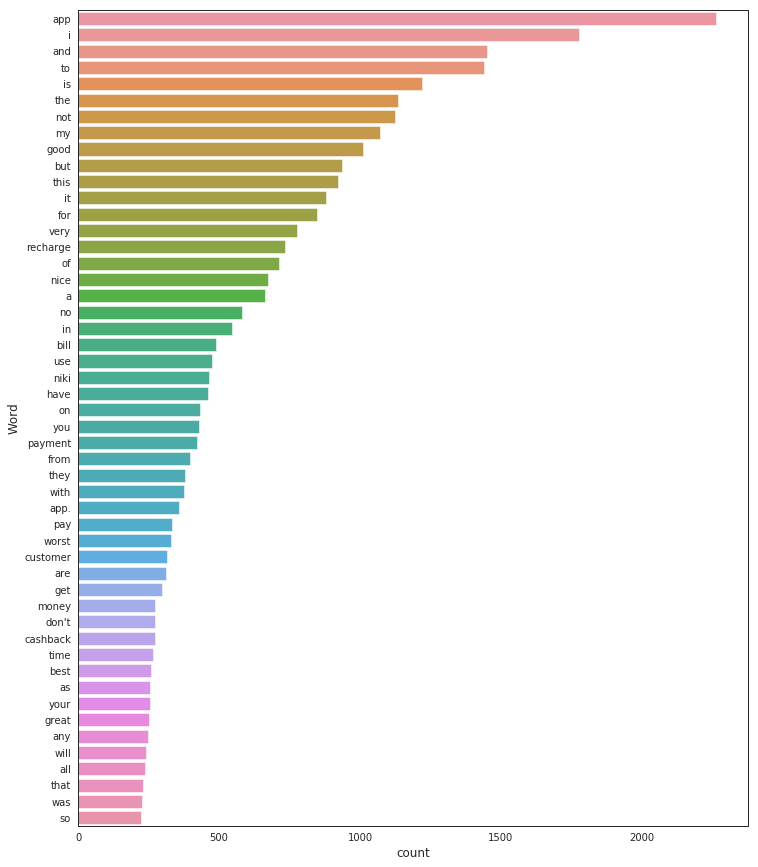

In [15]:
freq_words(train['Review_Text'], 50)

### Clean text with stopwords

In [16]:
def cleaner(text):
    translator = str.maketrans('', '', string.punctuation)
    words = word_tokenize(text.translate(translator))
    #words = list([val for val in words if val.isalpha()])
    clwords = [w for w in words if not w in stopwords.words('english')]
    return " ".join(clwords)

In [17]:
train['Clean_Review_Text'] = train['Review_Text'].apply(cleaner)

train['Clean_Review_Title'] = train['Review_Title'].apply(cleaner)

In [18]:
train.head()

,App_Version_Code,App_Version_Name,Review_Text,Review_Title,Star_Rating,Clean_Review_Text,Clean_Review_Title
id,,,,,,,
b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,0,NaN,very bad wallet balance not use.,x,1,bad wallet balance use,x
c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43,2.30,froud app i recharge 199 but not done also sen...,x,1,froud app recharge 199 done also send mail nik...,x
93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52,2.12,waste to write comments also,waste no use,2,waste write comments also,waste use
df2dcdef-c09a-4f35-afab-e1231d3fec9a,62,2.21,nice apo,x,5,nice apo,x
11f8f968-4cec-4424-8427-9709ab05b5be,69,2.28,good nice app,x,5,good nice app,x


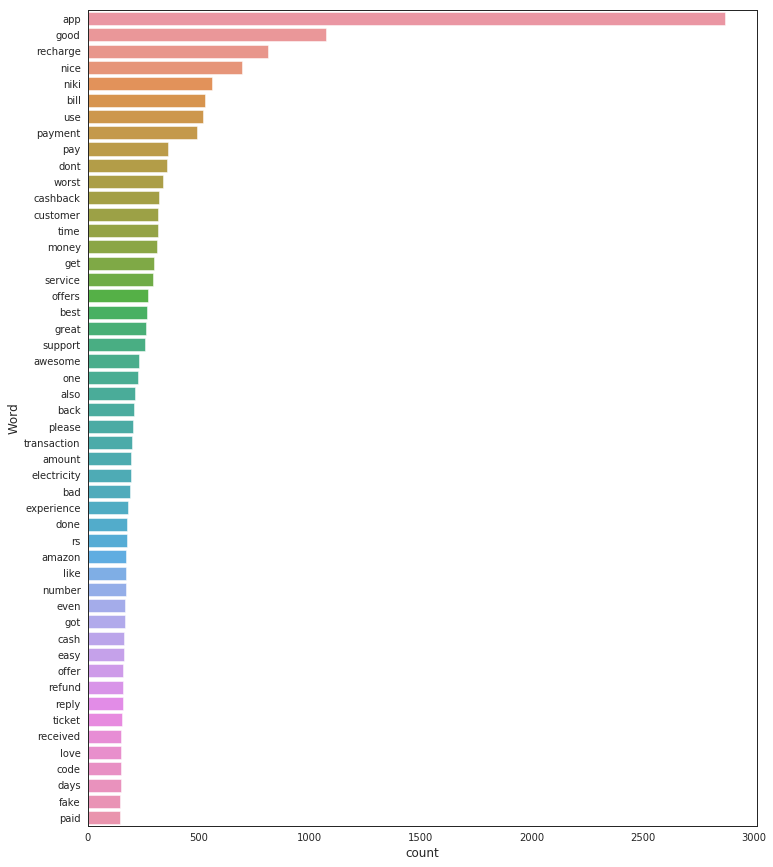

In [19]:
freq_words(train['Clean_Review_Text'], 50)

### sentiment analysis

In [20]:
def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity

In [21]:
train['Sent_Review_Text'] = train['Clean_Review_Text'].apply(sentiment_analysis)

train['Sent_Review_Title'] = train['Clean_Review_Title'].apply(sentiment_analysis)

In [22]:
train.head()

,App_Version_Code,App_Version_Name,Review_Text,Review_Title,Star_Rating,Clean_Review_Text,Clean_Review_Title,Sent_Review_Text,Sent_Review_Title
id,,,,,,,,,
b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,0,NaN,very bad wallet balance not use.,x,1,bad wallet balance use,x,-0.70,0.0
c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43,2.30,froud app i recharge 199 but not done also sen...,x,1,froud app recharge 199 done also send mail nik...,x,0.00,0.0
93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52,2.12,waste to write comments also,waste no use,2,waste write comments also,waste use,-0.20,-0.2
df2dcdef-c09a-4f35-afab-e1231d3fec9a,62,2.21,nice apo,x,5,nice apo,x,0.60,0.0
11f8f968-4cec-4424-8427-9709ab05b5be,69,2.28,good nice app,x,5,good nice app,x,0.65,0.0


In [23]:
train.corr()

,App_Version_Code,App_Version_Name,Star_Rating,Sent_Review_Text,Sent_Review_Title
App_Version_Code,1.000000,0.797276,0.081997,0.080170,-0.089671
App_Version_Name,0.797276,1.000000,0.057669,0.064361,-0.136852
Star_Rating,0.081997,0.057669,1.000000,0.673200,0.212798
Sent_Review_Text,0.080170,0.064361,0.673200,1.000000,0.097296
Sent_Review_Title,-0.089671,-0.136852,0.212798,0.097296,1.000000


## Here we can see positive correlation between Star Rating and Sent_Review_Text

# Modeling

In [24]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [25]:
def modelss(X_train,X_test,y_train,y_test):
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    y_pred = gaussian.predict(X_test)
    print("GaussianNB Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F : ",f1_score(y_test, y_pred, average="micro"))


    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    print("Perceptron Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F : ",f1_score(y_test, y_pred, average="micro"))


    linear_svc = LinearSVC()
    linear_svc.fit(X_train, y_train)
    y_pred = linear_svc.predict(X_test)
    print("LinearSVC Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F : ",f1_score(y_test, y_pred, average="micro"))



    sgd = SGDClassifier()
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    print("SGDClassifier Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F : ",f1_score(y_test, y_pred, average="micro"))


    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print("DecisionTreeClassifier Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F : ",f1_score(y_test, y_pred, average="micro"))
    
    
    lr = LogisticRegression()
    clf = OneVsRestClassifier(lr)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("LogisticRegression Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F : ",f1_score(y_test, y_pred, average="micro"))

    
    
    
    


#     knn = KNeighborsClassifier(n_neighbors=3)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     print("KNeighborsClassifier Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [26]:
cv1 = CountVectorizer()
X1 = cv1.fit_transform(train['Clean_Review_Text']).toarray()
cv2 = CountVectorizer()
X2 = cv2.fit_transform(train['Clean_Review_Title']).toarray()
X3 = train['Sent_Review_Text'].to_numpy().reshape(len(train['Sent_Review_Text']),-1)
X4 = train['App_Version_Code'].to_numpy().reshape(len(train['Sent_Review_Text']),-1)
X4 = get_one_hot(X4.reshape(-1),max(X4.flatten())+1)
X = np.concatenate((X1,X2,X3),axis = 1)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, train['Star_Rating'],test_size=0.3,random_state=9)
modelss(X_train,X_test,y_train,y_test)

GaussianNB Accuracy: 0.3202576112412178
F :  0.3202576112412178
Perceptron Accuracy: 0.7312646370023419
F :  0.7312646370023419
LinearSVC Accuracy: 0.747072599531616
F :  0.747072599531616
SGDClassifier Accuracy: 0.7564402810304449
F :  0.7564402810304449
DecisionTreeClassifier Accuracy: 0.7072599531615925
F :  0.7072599531615926
LogisticRegression Accuracy: 0.7792740046838408
F :  0.7792740046838408


In [28]:
tv1 = TfidfVectorizer()
tv2 = TfidfVectorizer()
X1 = tv1.fit_transform(train['Clean_Review_Text']).toarray()
X2 = tv2.fit_transform(train['Clean_Review_Title']).toarray()
X = np.concatenate((X1,X2,X3),axis = 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, train['Star_Rating'],test_size=0.3,random_state=9)
modelss(X_train,X_test,y_train,y_test)

GaussianNB Accuracy: 0.3261124121779859
F :  0.3261124121779859
Perceptron Accuracy: 0.7535128805620609
F :  0.7535128805620608
LinearSVC Accuracy: 0.7775175644028103
F :  0.7775175644028103
SGDClassifier Accuracy: 0.7634660421545667
F :  0.7634660421545668
DecisionTreeClassifier Accuracy: 0.7125292740046838
F :  0.7125292740046837
LogisticRegression Accuracy: 0.772248243559719
F :  0.772248243559719


# Prediction on test.csv

In [30]:
test = test.rename(columns = {'App Version Code':'App_Version_Code',
                                'App Version Name':'App_Version_Name',
                                'Review Text':'Review_Text',
                                'Review Title':'Review_Title',
                                'Star Rating':'Star_Rating'})

test['App_Version_Code'].fillna(0, inplace = True)
test['Review_Title'].fillna('X', inplace = True)
test['App_Version_Code'] = test['App_Version_Code'].astype(int)
test['Review_Text'] = test['Review_Text'].astype(str).str.lower()
test['Review_Title'] = test['Review_Title'].astype(str).str.lower()

test['Clean_Review_Text'] = test['Review_Text'].apply(cleaner)

test['Clean_Review_Title'] = test['Review_Title'].apply(cleaner)

test['Sent_Review_Text'] = test['Clean_Review_Text'].apply(sentiment_analysis)

test['Sent_Review_Title'] = test['Clean_Review_Title'].apply(sentiment_analysis)

In [31]:
tv1 = TfidfVectorizer()
tv1.fit(np.concatenate((train['Clean_Review_Text'], test['Clean_Review_Text'])))
tv2 = TfidfVectorizer()
tv2.fit(np.concatenate((train['Clean_Review_Title'], test['Clean_Review_Title'])))


X1 = tv1.transform(train['Clean_Review_Text']).toarray()
X2 = tv2.transform(train['Clean_Review_Title']).toarray()
X3 = train['Sent_Review_Text'].to_numpy().reshape(len(train['Sent_Review_Text']),-1)
X4 = train['App_Version_Code'].to_numpy().reshape(len(train['Sent_Review_Text']),-1)
X4 = get_one_hot(X4.reshape(-1),max(X4.flatten())+1)
X_train = np.concatenate((X1,X2,X3),axis = 1)
y_train = train['Star_Rating']

X1 = tv1.transform(test['Clean_Review_Text']).toarray()
X2 = tv2.transform(test['Clean_Review_Title']).toarray()
X3 = test['Sent_Review_Text'].to_numpy().reshape(len(test['Sent_Review_Text']),-1)
X4 = test['App_Version_Code'].to_numpy().reshape(len(test['Sent_Review_Text']),-1)
X4 = get_one_hot(X4.reshape(-1),max(X4.flatten())+1)
X_test = np.concatenate((X1,X2,X3),axis = 1)

In [32]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)

In [33]:
test['Star Rating'] = y_pred

In [34]:
test.head()

,App_Version_Code,App_Version_Name,Review_Text,Review_Title,Clean_Review_Text,Clean_Review_Title,Sent_Review_Text,Sent_Review_Title,Star Rating
id,,,,,,,,,
bdcb3129-afc1-4608-825f-558fe9c17e2b,78,2.37,"awesome app, all should use it",x,awesome app use,x,1.000000,0.0,5
7518d5c8-5e35-45e2-b29d-cf0996ba9e2f,75,2.34,how can i stop notification,x,stop notification,x,0.000000,0.0,4
b21ca913-ba44-471b-91e1-aaf035379a84,0,NaN,"this app is very easy to use , nice graphics ,...",x,app easy use nice graphics great uis ola cabs ...,x,0.566667,0.0,5
beaaa17d-44af-44c8-ba38-24ba54c3b17d,83,2.42,quite good but felt slow response from cc. ove...,x,quite good felt slow response cc good app,x,0.366667,0.0,5
89d8c4f0-6fe0-4389-b1f8-913ba894c0f1,74,2.33,not getting otp for login since yesterday. als...,x,getting otp login since yesterday also one pro...,x,0.000000,0.0,1


In [35]:
test['Star Rating'].to_csv('../predictions.csv',header = True)

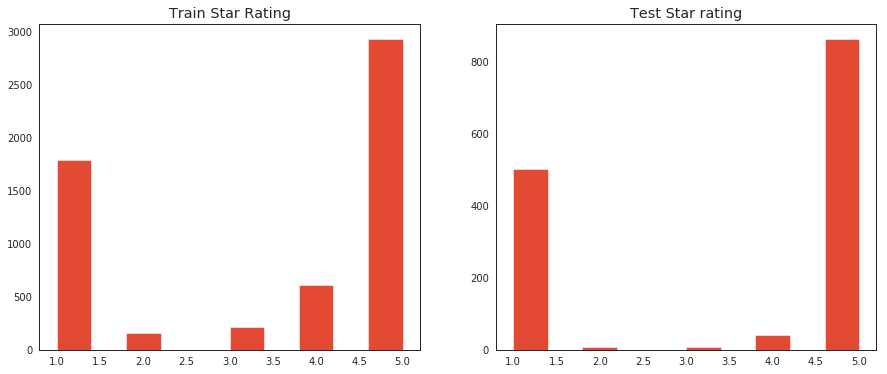

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(train['Star_Rating'])
plt.title('Train Star Rating')
plt.subplot(1, 2, 2)
plt.hist(test['Star Rating'])
plt.title('Test Star rating')
plt.show()

# Analysis

Text(0, 0.5, 'No Of User')

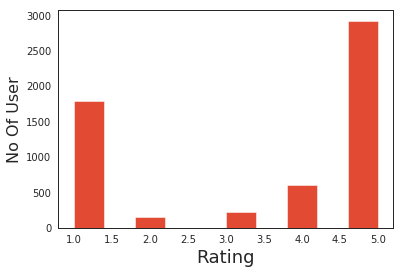

In [37]:
#total Rating
plt.hist(train['Star_Rating'])
plt.xlabel('Rating', fontsize = 18)
plt.ylabel('No Of User', fontsize = 16)

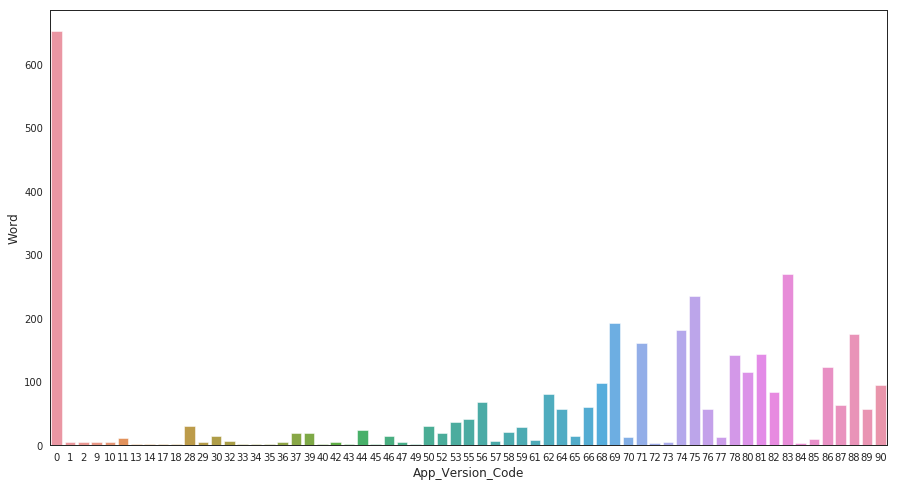

In [38]:
#positive rating by app version ( based on rating > 3)
temp = train[train['Star_Rating'] > 3]
temp = temp.groupby('App_Version_Code').count()['Star_Rating'].reset_index()


plt.figure(figsize=(15,8))
ax = sns.barplot(data=temp,x='App_Version_Code', y='Star_Rating')
ax.set(ylabel = 'Word')
plt.show()

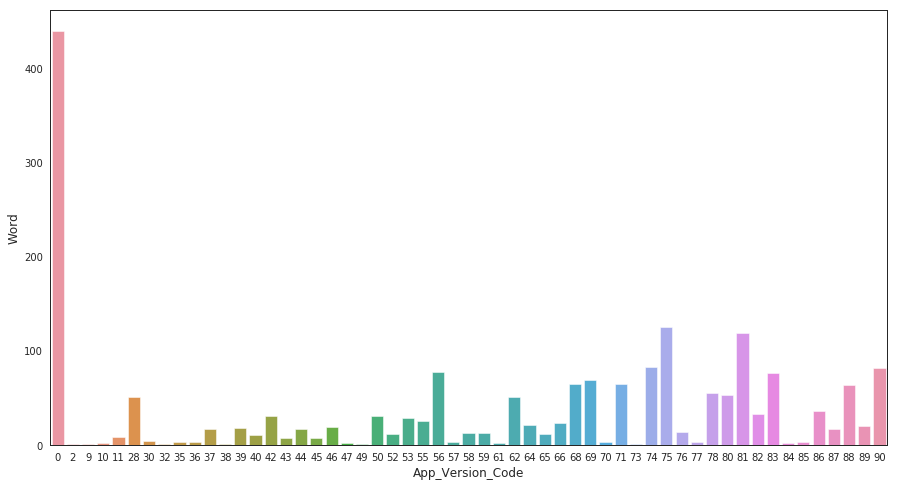

In [39]:
#negative rating by app version ( based on rating < 3)
temp = train[train['Star_Rating'] < 3]
temp = temp.groupby('App_Version_Code').count()['Star_Rating'].reset_index()


plt.figure(figsize=(15,8))
ax = sns.barplot(data=temp,x='App_Version_Code', y='Star_Rating')
ax.set(ylabel = 'Word')
plt.show()

In [40]:
df = pd.concat([train['App_Version_Code'], pd.get_dummies(train['Star_Rating'])], axis=1)

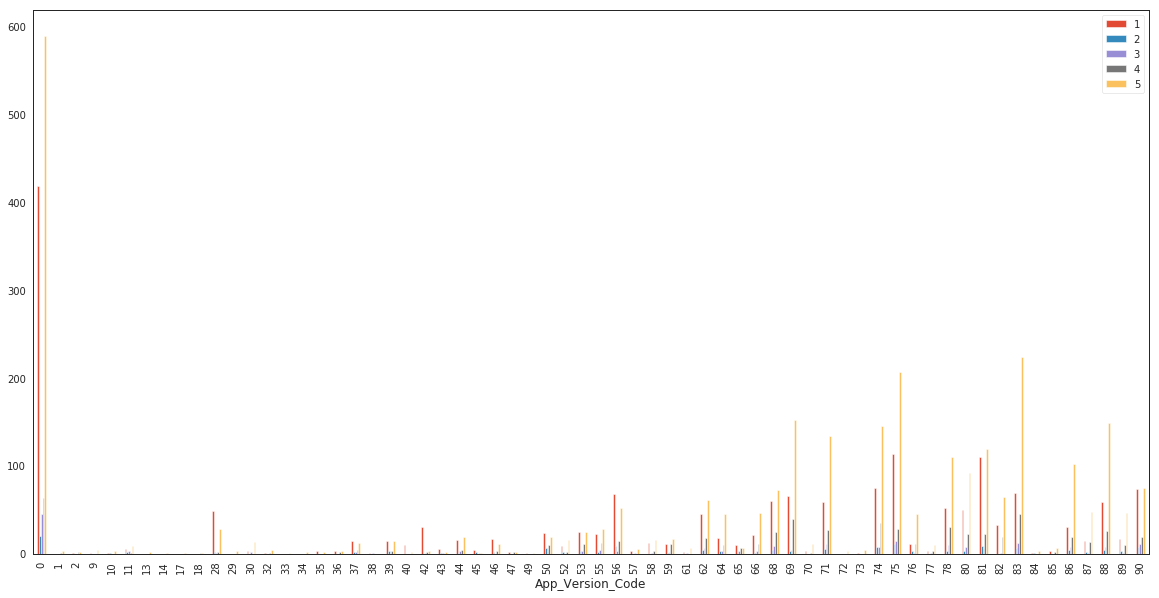

In [41]:

df = df.groupby('App_Version_Code').sum()
df.plot.bar(figsize=(20,10))